In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel(r'C:\Users\USER\Desktop\chinmay\projects\HousePricePrediction.xlsx')
print(dataset.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape

(2919, 13)

In [4]:
dataset.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2

In [5]:
dataset.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  

In [7]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables:", len(object_cols))


Categorical Variables: 4


In [8]:
int_ = (dataset.dtypes =='int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 0


In [9]:
fl_ = (dataset.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Float variables: 3


<Axes: >

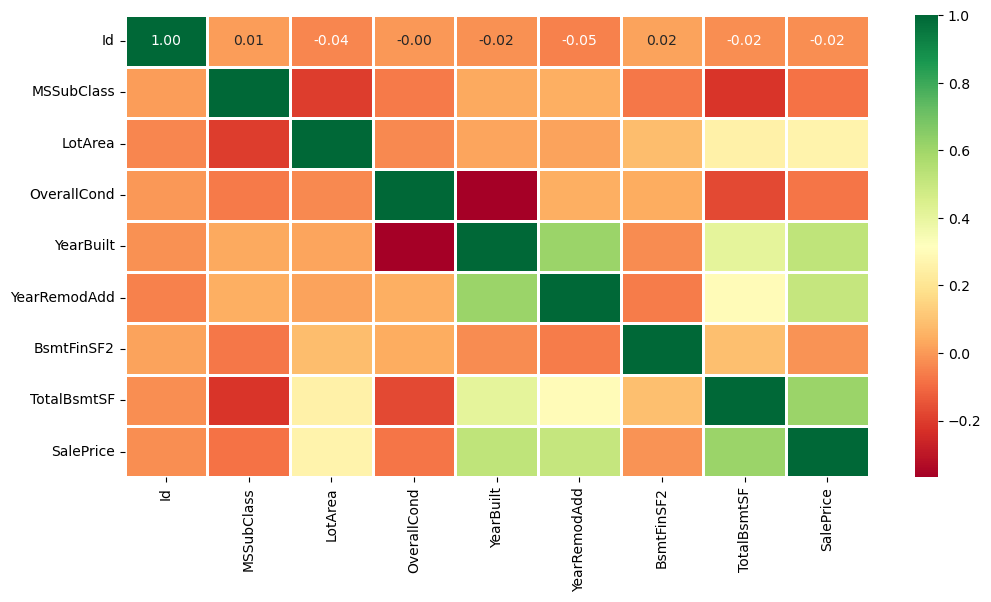

In [13]:
numerical_dataset = dataset.select_dtypes(include =['number'])

plt.figure(figsize = (12,6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'RdYlGn',
            fmt = '.2f',
            linewidths = 2,
            annot = True)



E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Number of Unique values of categorical features'}>

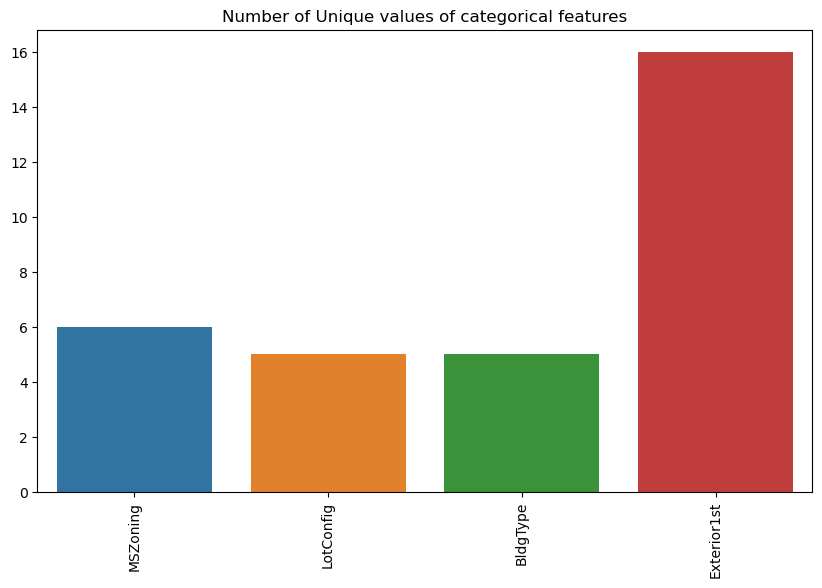

In [15]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Number of Unique values of categorical features')
plt.xticks(rotation = 90)
sns.barplot (x=object_cols,y = unique_values)

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


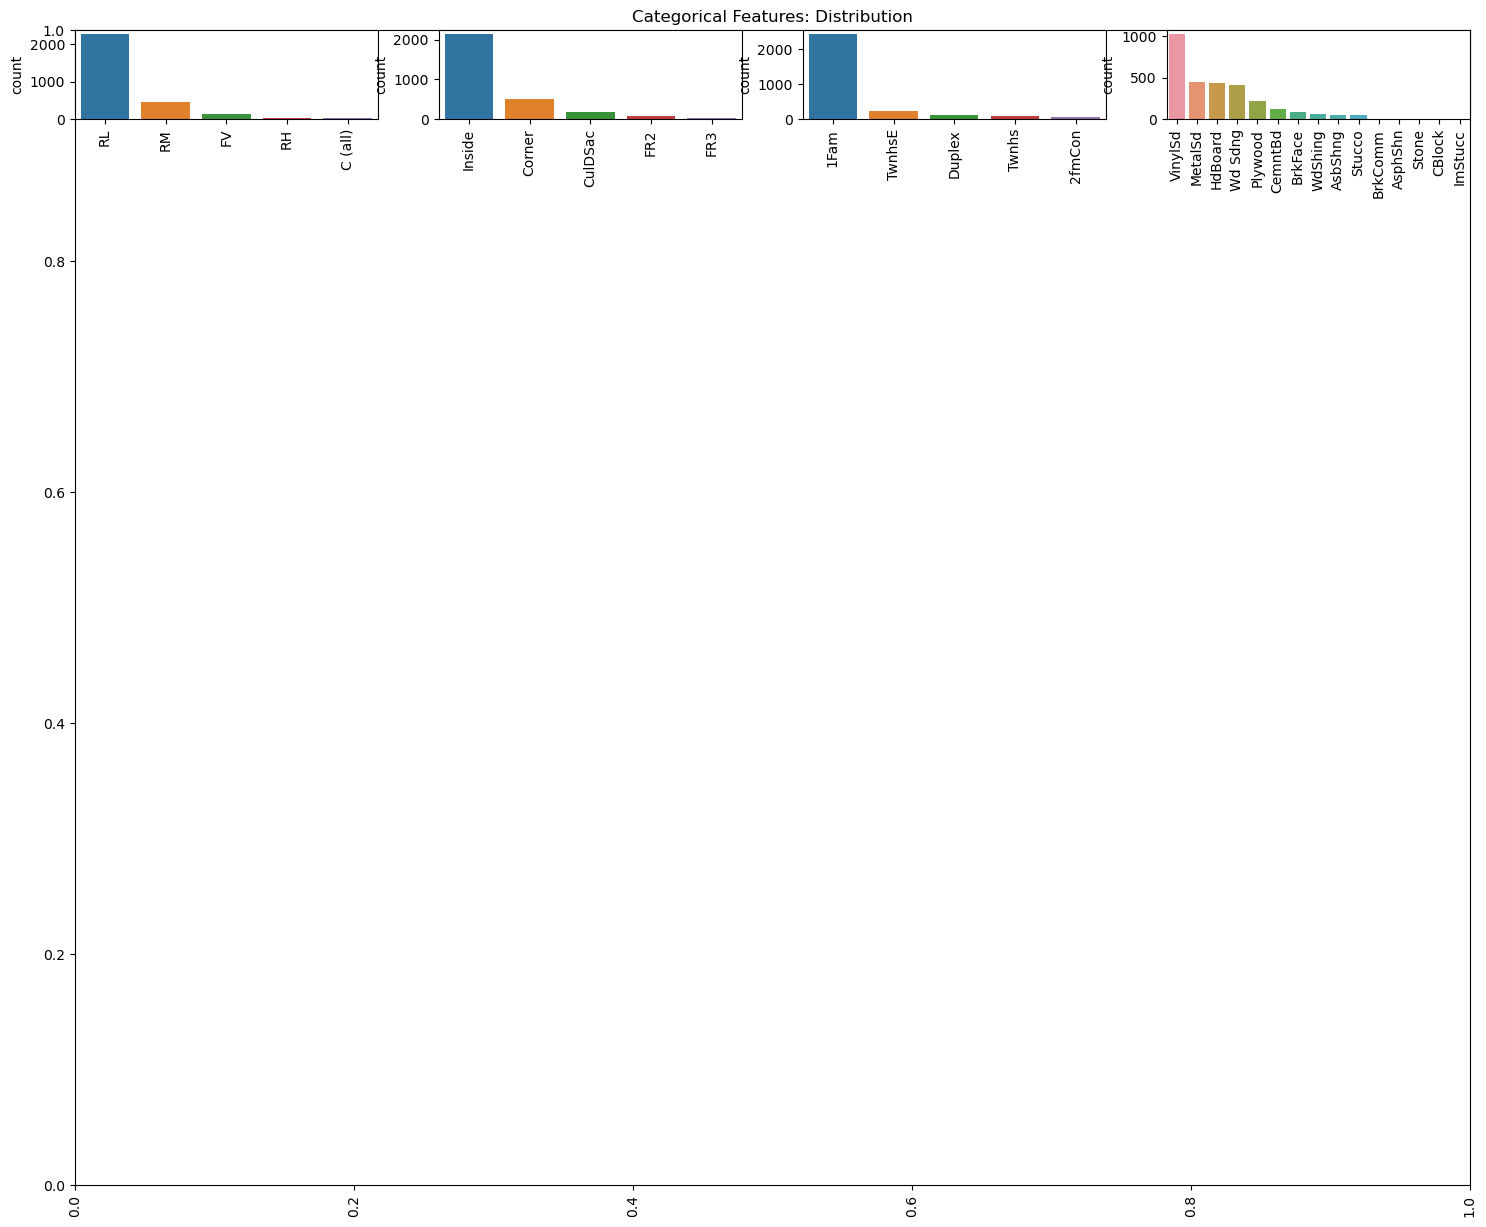

In [17]:
plt.figure(figsize=(18,15))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation = 90)
index = 1

for col in object_cols:
    y=dataset[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index),y=y)
    index=index+1

In [18]:
dataset.drop(['Id'],axis=1,inplace =True)
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [19]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
dataset['SalePrice']

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2919, dtype: float64

In [20]:
new_dataset = dataset.dropna()

In [21]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables")
print(object_cols)
print('No. of categorical features:', len(object_cols))

Categorical variables
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features: 4


In [24]:
OH_encoder = OneHotEncoder(sparse = False,handle_unknown = 'ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis = 1)
df_final = pd.concat([df_final,OH_cols], axis = 1)

E:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use 'sparse_output' instead of 'sparse'
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop original categorical columns and concatenate the new one-hot encoded columns
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

X_train,X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size = 0.8,test_size=0.2,random_state=0)
X_train
X_valid
Y_train
Y_valid

1728    180921.19589
2689    180921.19589
1151    149900.00000
2762    180921.19589
1180    250000.00000
            ...     
1840    180921.19589
776     221500.00000
1519    180921.19589
1359    315000.00000
563     185000.00000
Name: SalePrice, Length: 583, dtype: float64

In [29]:
X_train

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1453,20,17217,5,2006,2006,0.0,1140.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021,20,19508,5,1974,1974,0.0,1430.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,90,7018,5,1979,1979,0.0,1086.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1273,80,11512,7,1959,2006,0.0,1019.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1960,20,7560,5,1971,1971,613.0,864.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,9430,5,1999,1999,0.0,1252.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
835,20,9600,7,1950,1995,0.0,1067.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1653,160,2308,5,1976,1976,0.0,804.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2612,20,11625,7,1983,1983,0.0,816.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

NameError: name 'mean_absolute_percentage_error' is not defined